In [1]:
import pandas as pd
import numpy as np 
import ydata_profiling as pp
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\mshiv\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\mshiv\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [2]:
ol_df = pd.read_csv(r"E:\Data Science Projects\Project Files\Online_food_delivery_preferences_banglore_region\onlinedeliverydata.csv")

In [3]:
ol_df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...


# EDA

In [4]:
ol_df.isnull().sum().sort_values()

Age                                          0
Unaffordable                                 0
Long delivery time                           0
Delay of delivery person getting assigned    0
Delay of delivery person picking up food     0
Wrong order delivered                        0
Missing item                                 0
Order placed by mistake                      0
Influence of time                            0
Order Time                                   0
Maximum wait time                            0
Residence in busy location                   0
Unavailability                               0
Google Maps Accuracy                         0
Low quantity low time                        0
Delivery person ability                      0
Influence of rating                          0
Less Delivery time                           0
High Quality of package                      0
Number of calls                              0
Politeness                                   0
Freshness    

In [5]:
ol_df['Reviews'].isnull().sum()

1

In [6]:
ol_df['Reviews'].dtypes

dtype('O')

In [7]:
ol_df['Reviews'].describe()

count     387
unique    180
top       NIL
freq       78
Name: Reviews, dtype: object

In [8]:
ol_df['Reviews'] = ol_df['Reviews'].fillna(ol_df['Reviews'].unique)

In [9]:
ol_df['Reviews'].isnull().sum()

0

In [10]:
ol_df.shape

(388, 55)

In [11]:
ol_df['Good Food quality'].unique()

array(['Neutral', 'Disagree', 'Agree', 'agree', 'Strongly agree',
       'Strongly disagree'], dtype=object)

In [12]:
ol_df['Good Taste '].unique()

array(['Moderately Important', 'Very Important', 'Important',
       'Slightly Important', 'Unimportant'], dtype=object)

In [13]:
ol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [14]:
num_data = [i for i in ol_df.columns if ol_df[i].dtypes!='object']

In [15]:
cat_data =[i for i in ol_df.columns if ol_df[i].dtypes=='object']

In [16]:
num_data

['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

In [17]:
cat_data

['Gender',
 'Marital Status',
 'Occupation',
 'Monthly Income',
 'Educational Qualifications',
 'Medium (P1)',
 'Medium (P2)',
 'Meal(P1)',
 'Meal(P2)',
 'Perference(P1)',
 'Perference(P2)',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Self Cooking',
 'Health Concern',
 'Late Delivery',
 'Poor Hygiene',
 'Bad past experience',
 'Unavailability',
 'Unaffordable',
 'Long delivery time',
 'Delay of delivery person getting assigned',
 'Delay of delivery person picking up food',
 'Wrong order delivered',
 'Missing item',
 'Order placed by mistake',
 'Influence of time',
 'Order Time',
 'Maximum wait time',
 'Residence in busy location',
 'Google Maps Accuracy',
 'Good Road Condition',
 'Low quantity low time',
 'Delivery person ability',
 'Influence of rating',
 'Less Delivery time',
 'High Quality of package',
 'Number of calls',
 'Politeness',
 'Freshness ',
 'Tempe

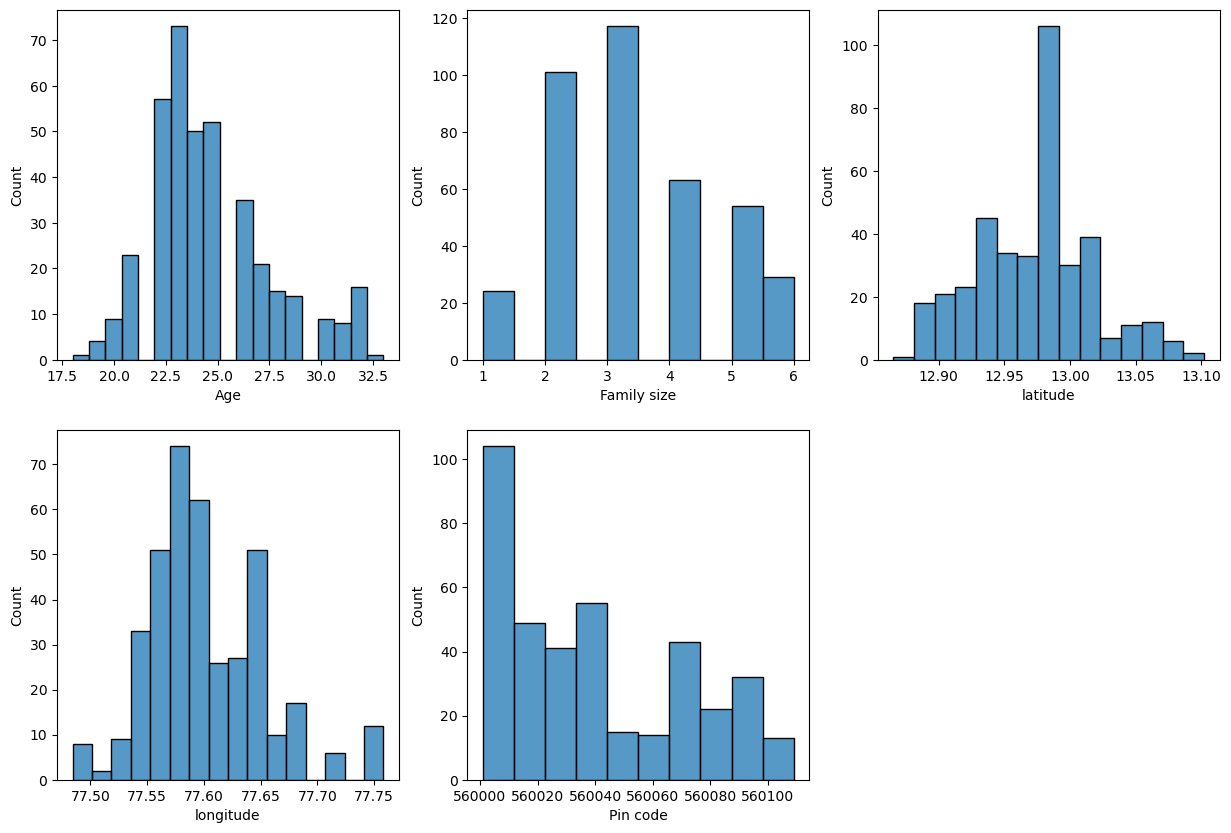

In [18]:
plt.figure(figsize=(15,10))

for i , col in enumerate(num_data):
    plt.subplot(2,3,i+1)
    sns.histplot(data=ol_df,x=col)
plt.show()

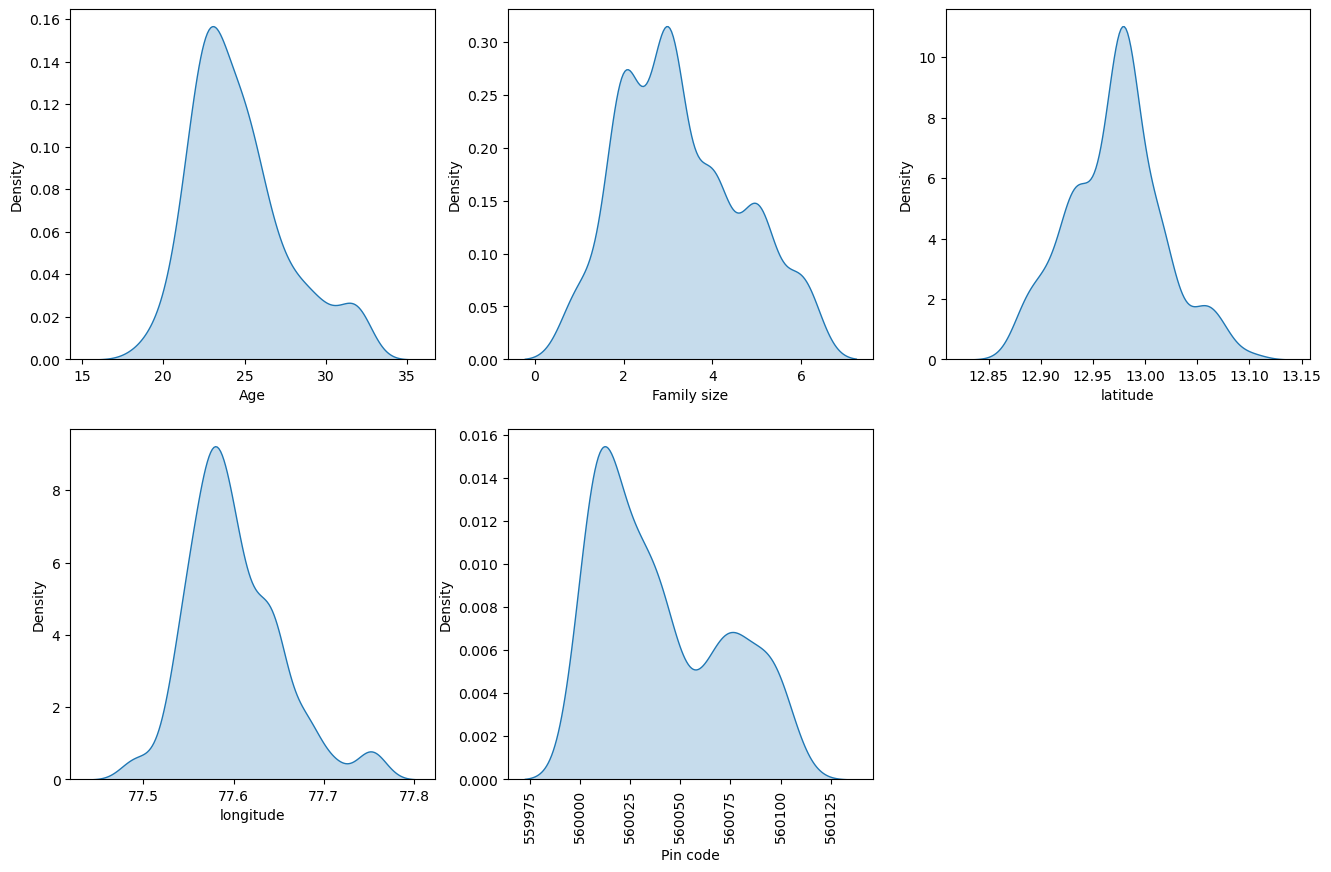

In [19]:
plt.figure(figsize=(16,10))

for i , col in enumerate(num_data):
    plt.subplot(2,3,i+1)
    sns.kdeplot(data=ol_df,x=col,fill=True)
plt.xticks(rotation = 90)
plt.show()

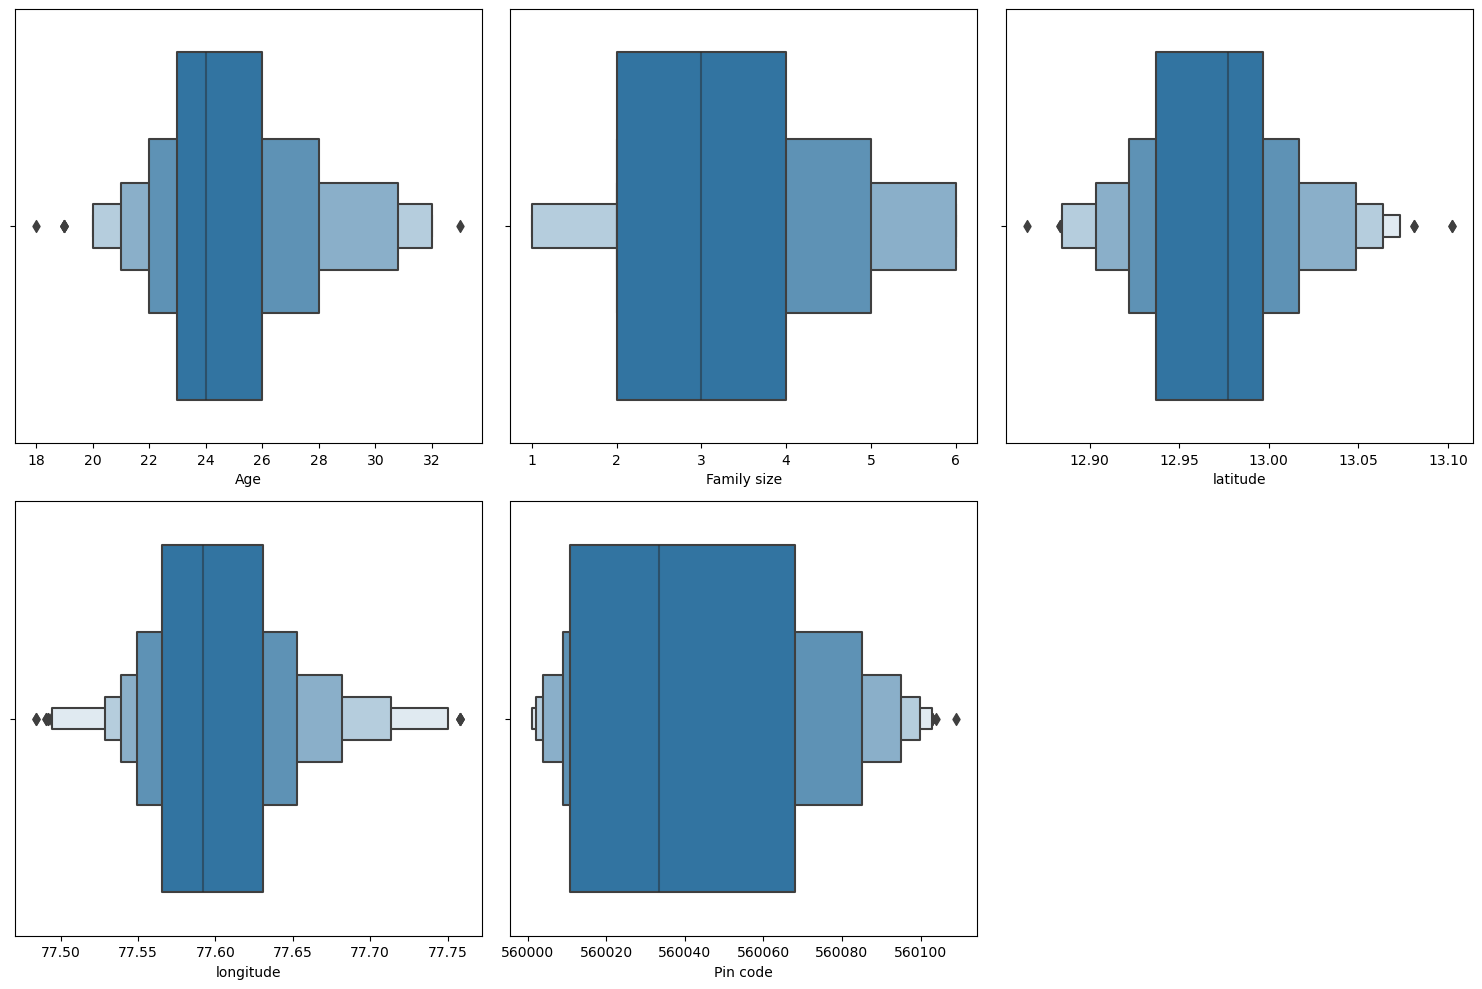

In [20]:
plt.figure(figsize=(15,10))


for i , col in enumerate(num_data):
    plt.subplot(2,3,i+1)
    sns.boxenplot(data=ol_df,x=col)
plt.tight_layout()
plt.show()

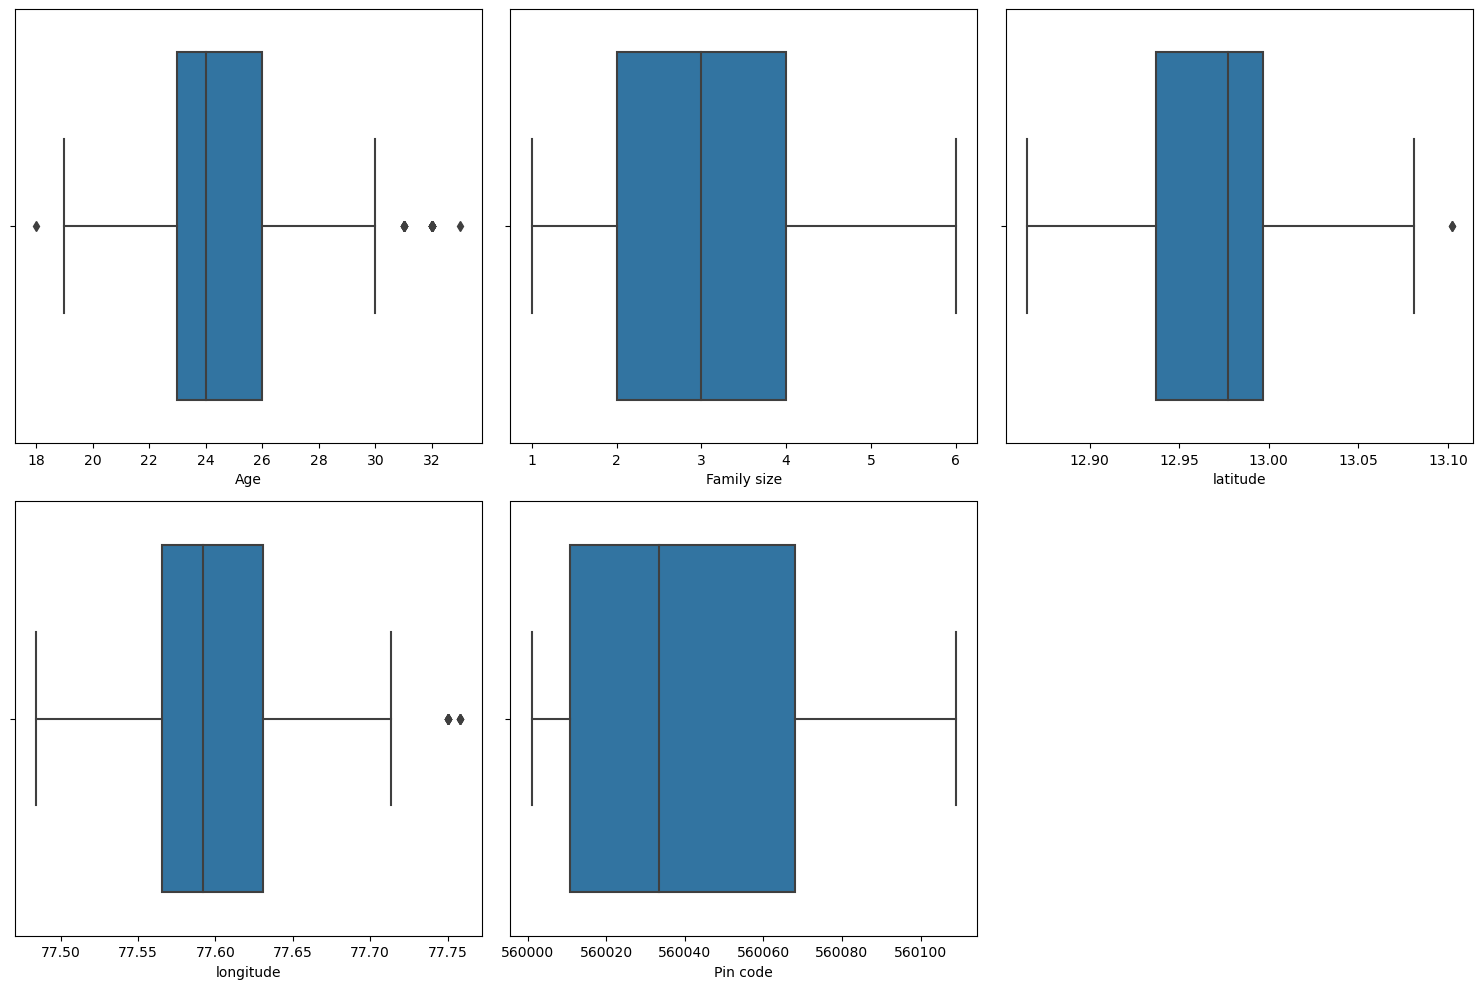

In [21]:
plt.figure(figsize=(15,10))


for i , col in enumerate(num_data):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=ol_df,x=col)
plt.tight_layout()
plt.show()

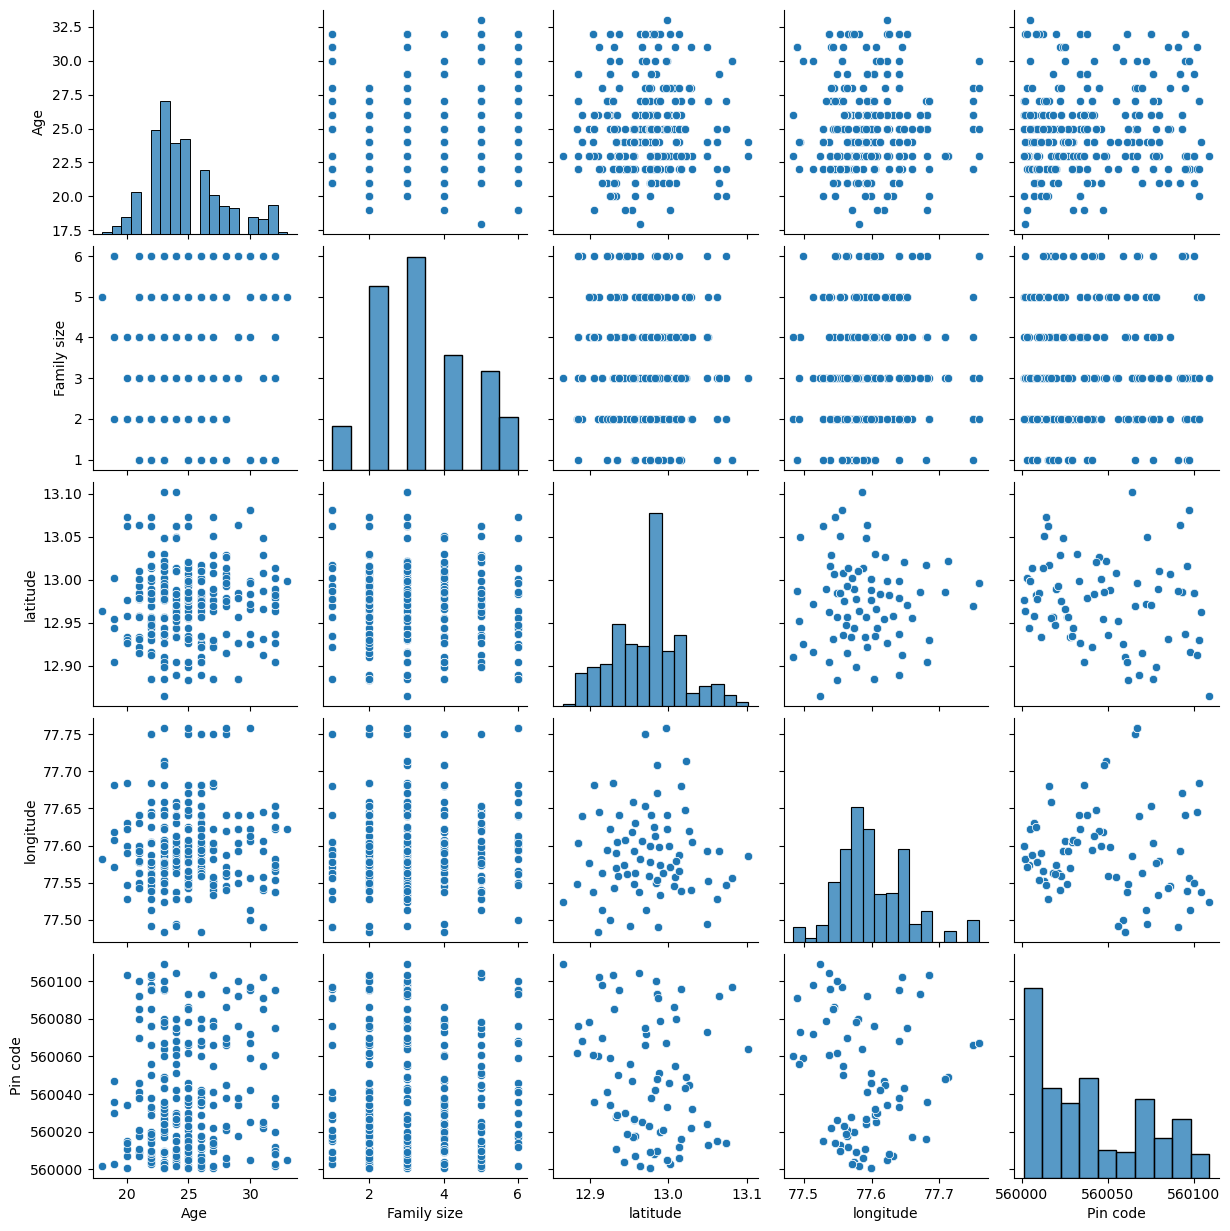

In [22]:
sns.pairplot(ol_df)

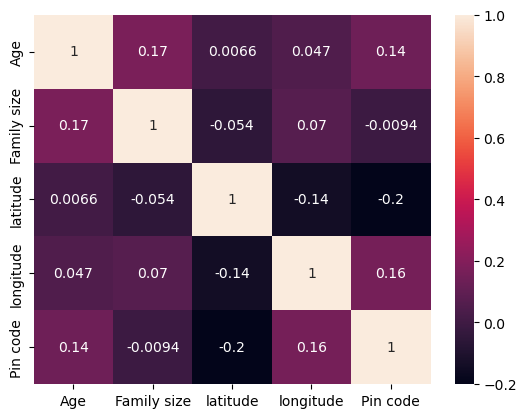

In [23]:
sns.heatmap(ol_df[num_data].corr(),annot=True)
plt.show()

# Outlier Detection

In [24]:
def remove_outlier_IQR(data,col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound =Q3 + 1.5 * IQR
    return data[(data[col] > lower_bound) & (data[col]<upper_bound)]

In [25]:
imp_col = ['Age','latitude','longitude']

In [26]:
for col in imp_col:
    ol_df= remove_outlier_IQR(ol_df,col)

In [27]:
cat_data

['Gender',
 'Marital Status',
 'Occupation',
 'Monthly Income',
 'Educational Qualifications',
 'Medium (P1)',
 'Medium (P2)',
 'Meal(P1)',
 'Meal(P2)',
 'Perference(P1)',
 'Perference(P2)',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Self Cooking',
 'Health Concern',
 'Late Delivery',
 'Poor Hygiene',
 'Bad past experience',
 'Unavailability',
 'Unaffordable',
 'Long delivery time',
 'Delay of delivery person getting assigned',
 'Delay of delivery person picking up food',
 'Wrong order delivered',
 'Missing item',
 'Order placed by mistake',
 'Influence of time',
 'Order Time',
 'Maximum wait time',
 'Residence in busy location',
 'Google Maps Accuracy',
 'Good Road Condition',
 'Low quantity low time',
 'Delivery person ability',
 'Influence of rating',
 'Less Delivery time',
 'High Quality of package',
 'Number of calls',
 'Politeness',
 'Freshness ',
 'Tempe

In [28]:
ol_df[cat_data].info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 387
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Gender                                     348 non-null    object
 1   Marital Status                             348 non-null    object
 2   Occupation                                 348 non-null    object
 3   Monthly Income                             348 non-null    object
 4   Educational Qualifications                 348 non-null    object
 5   Medium (P1)                                348 non-null    object
 6   Medium (P2)                                348 non-null    object
 7   Meal(P1)                                   348 non-null    object
 8   Meal(P2)                                   348 non-null    object
 9   Perference(P1)                             348 non-null    object
 10  Perference(P2)                             

In [29]:
remove_elements = ['Reviews','Output','Temperature','High Quality of package','Influence of rating','Delivery person ability','Good Road Condition','Influence of time']
for element in remove_elements:
    cat_data.remove(element)

In [30]:
cat_data

['Gender',
 'Marital Status',
 'Occupation',
 'Monthly Income',
 'Educational Qualifications',
 'Medium (P1)',
 'Medium (P2)',
 'Meal(P1)',
 'Meal(P2)',
 'Perference(P1)',
 'Perference(P2)',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Self Cooking',
 'Health Concern',
 'Late Delivery',
 'Poor Hygiene',
 'Bad past experience',
 'Unavailability',
 'Unaffordable',
 'Long delivery time',
 'Delay of delivery person getting assigned',
 'Delay of delivery person picking up food',
 'Wrong order delivered',
 'Missing item',
 'Order placed by mistake',
 'Order Time',
 'Maximum wait time',
 'Residence in busy location',
 'Google Maps Accuracy',
 'Low quantity low time',
 'Less Delivery time',
 'Number of calls',
 'Politeness',
 'Freshness ',
 'Good Taste ',
 'Good Quantity']

# OneHotEncoding and Standard Scaler

In [31]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler




encoder=OneHotEncoder(drop='first',sparse=False)
encoder_cols=pd.DataFrame(encoder.fit_transform(ol_df[cat_data]),columns=encoder.get_feature_names_out(cat_data))

In [32]:
scaler=StandardScaler()
scaled_cols=pd.DataFrame(scaler.fit_transform(ol_df[num_data]),columns=scaler.get_feature_names_out(num_data))

In [33]:
encoder_cols

,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,...,Freshness _Unimportant,Freshness _Very Important,Good Taste _Moderately Important,Good Taste _Slightly Important,Good Taste _Unimportant,Good Taste _Very Important,Good Quantity_Moderately Important,Good Quantity_Slightly Important,Good Quantity_Unimportant,Good Quantity_Very Important
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
345,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
346,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [34]:
scaled_cols

,Age,Family size,latitude,longitude,Pin code
0,-1.744835,0.590624,0.121576,0.081628,-1.207519
1,-0.051104,-0.170625,0.130525,-0.419730,-0.951250
2,-0.897970,-0.170625,-0.359456,1.448967,-0.694981
3,-0.897970,2.113123,-0.533969,-0.777517,-0.630914
4,-0.897970,0.590624,0.309514,-0.966666,-0.919216
...,...,...,...,...,...
343,-0.474537,-0.931874,0.121576,0.081628,-1.207519
344,-0.474537,0.590624,0.318463,2.561069,0.298060
345,-0.897970,1.351874,0.309514,-0.966666,-0.919216
346,-0.474537,-0.931874,0.130525,-0.419730,-0.951250


In [35]:
x=pd.concat([encoder_cols,scaled_cols],axis=1)
y=scaled_cols['Family size']

In [36]:
x

,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,...,Good Taste _Very Important,Good Quantity_Moderately Important,Good Quantity_Slightly Important,Good Quantity_Unimportant,Good Quantity_Very Important,Age,Family size,latitude,longitude,Pin code
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,-1.744835,0.590624,0.121576,0.081628,-1.207519
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.051104,-0.170625,0.130525,-0.419730,-0.951250
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,-0.897970,-0.170625,-0.359456,1.448967,-0.694981
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,-0.897970,2.113123,-0.533969,-0.777517,-0.630914
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.897970,0.590624,0.309514,-0.966666,-0.919216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,-0.474537,-0.931874,0.121576,0.081628,-1.207519
344,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,-0.474537,0.590624,0.318463,2.561069,0.298060
345,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,-0.897970,1.351874,0.309514,-0.966666,-0.919216
346,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.474537,-0.931874,0.130525,-0.419730,-0.951250


In [37]:
y

0      0.590624
1     -0.170625
2     -0.170625
3      2.113123
4      0.590624
         ...   
343   -0.931874
344    0.590624
345    1.351874
346   -0.931874
347    1.351874
Name: Family size, Length: 348, dtype: float64

# Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
x_train

,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,...,Good Taste _Very Important,Good Quantity_Moderately Important,Good Quantity_Slightly Important,Good Quantity_Unimportant,Good Quantity_Very Important,Age,Family size,latitude,longitude,Pin code
177,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,-0.051104,1.351874,-0.202841,-1.324453,2.091940
78,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,-0.474537,-0.170625,-0.824825,0.197852,-0.310578
90,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.372329,-1.693123,0.130525,-0.419730,-0.951250
16,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.642628,-0.931874,0.159611,1.027371,-0.022276
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-0.051104,0.590624,-0.612277,-0.499491,-1.111418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,-1.321403,-0.931874,0.671965,0.086186,0.233992
71,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.795762,0.590624,0.687627,-0.556464,-1.143451
106,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.372329,-0.170625,0.121576,0.081628,-1.207519
270,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,-0.897970,-0.170625,0.130525,-0.419730,-0.951250


In [40]:
y_train

177    1.351874
78    -0.170625
90    -1.693123
16    -0.931874
66     0.590624
         ...   
188   -0.931874
71     0.590624
106   -0.170625
270   -0.170625
102    1.351874
Name: Family size, Length: 278, dtype: float64

In [41]:
x_test

,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,...,Good Taste _Very Important,Good Quantity_Moderately Important,Good Quantity_Slightly Important,Good Quantity_Unimportant,Good Quantity_Very Important,Age,Family size,latitude,longitude,Pin code
255,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,-1.744835,-0.931874,2.287336,-1.123910,-0.791082
114,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,-0.474537,-0.170625,0.130525,-0.419730,-0.951250
314,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.372329,-0.931874,0.159611,1.027371,-0.022276
268,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.897970,0.590624,0.309514,-0.966666,-0.919216
167,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,-0.051104,-0.170625,1.734709,-0.077895,-0.470746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.795762,1.351874,-0.296810,0.801760,-1.015317
180,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.372329,-0.170625,-1.484845,1.968556,-0.086343
183,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,-0.474537,-1.693123,0.130525,-0.419730,-0.951250
197,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.372329,-0.931874,-1.963639,-1.073774,0.746530


In [42]:
y_test

255   -0.931874
114   -0.170625
314   -0.931874
268    0.590624
167   -0.170625
         ...   
93     1.351874
180   -0.170625
183   -1.693123
197   -0.931874
325   -0.170625
Name: Family size, Length: 70, dtype: float64

# Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [44]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred = lr_model.predict(x_test)

In [46]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [47]:
print('Mean Absolute Error = ',mae)
print('Mean Squared Error = ',mse)
print('Root Mean Squared Error = ',rmse)

Mean Absolute Error =  1.541623971336646e-15
Mean Squared Error =  3.7147336767341005e-30
Root Mean Squared Error =  1.9273644379655086e-15


In [48]:
res = r2_score(y_test, y_pred)
print('R2 Score = ',res)

R2 Score =  1.0


# Decision Tress Regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
dt_model = DecisionTreeRegressor()


In [51]:
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [52]:
y_pred = dt_model.predict(x_test)

In [53]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)


print('Mean Absolute Error = ',mae)
print('Mean Squared Error = ',mse)
print('Root Mean Squared Error = ',rmse)

Mean Absolute Error =  1.9072045530167867e-16
Mean Squared Error =  9.021055859509812e-32
Root Mean Squared Error =  3.003507259773116e-16


In [54]:
res= r2_score(y_test, y_pred)
print('R2 Score = ',res)

R2 Score =  1.0


# Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [57]:
y_pred = rf_model.predict(x_test)

In [58]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)


print('Mean Absolute Error = ',mae)
print('Mean Squared Error = ',mse)
print('Root Mean Squared Error = ',rmse)

Mean Absolute Error =  8.05308201076319e-16
Mean Squared Error =  1.3829387585236825e-30
Root Mean Squared Error =  1.175984165932383e-15


In [59]:
res = r2_score(y_test, y_pred)
print('R2 Score = ',res)

R2 Score =  1.0


# XGBoost

In [60]:
import xgboost as xgb

In [61]:
model=xgb.XGBRegressor()

In [62]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
y_pred = model.predict(x_test)

In [64]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)


print('Mean Absolute Error = ',mae)
print('Mean Squared Error = ',mse)
print('Root Mean Squared Error = ',rmse)

Mean Absolute Error =  5.611501643431446e-05
Mean Squared Error =  7.3831338881030495e-09
Root Mean Squared Error =  8.59251644636369e-05


In [65]:
res= r2_score(y_test,y_pred)
print('R2 Score = ',res)

R2 Score =  0.9999999930044237


### Cross Validation

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
#For Linear Regression 
score = cross_val_score(lr_model , x , y , cv=5 , scoring='r2')
print('cross_val_score: ',score , score.mean() , score.std())

cross_val_score:  [0.99998941 1.         1.         0.99994875 1.        ] 0.9999876323679789 1.986909185495046e-05


In [68]:
#for Decision Tree 
score = cross_val_score(dt_model , x , y , cv=5 , scoring='r2')
print('cross_val_score: ',score , score.mean() , score.std())

cross_val_score:  [1. 1. 1. 1. 1.] 1.0 0.0


In [69]:
# for Random Forest
score = cross_val_score(rf_model, x, y, cv=5, scoring='r2')
print('cross_val_score: ',score , score.mean() , score.std())

cross_val_score:  [1. 1. 1. 1. 1.] 1.0 0.0


In [70]:
#XGBoost
score = cross_val_score(model, x, y, cv=5, scoring='r2')
print('cross_val_score: ',score , score.mean() , score.std())

cross_val_score:  [1.         0.99999999 0.99999999 0.99999999 0.99999999] 0.9999999936651823 1.2400077614821177e-09


### Ridge Model   &   LASO 

In [71]:
from sklearn.linear_model import Ridge,Lasso

In [72]:
ridge_model=Ridge(alpha=1.0)
ridge_score=cross_val_score(ridge_model,x_train,y_train,cv=5) # use scoring method f1_macro or neg_mean_squared_error

In [73]:
ridge_score

array([0.99931719, 0.99940819, 0.99966434, 0.99959579, 0.99938123])

In [74]:
lasso_model=Lasso(alpha=1.0)
lasso_score= cross_val_score(lasso_model,x_train,y_train,cv=5) # use scoring method f1_macro or neg_mean_squared_error

In [75]:
lr_model.fit(x_train,y_train)
lr_prediction=lr_model.predict(x_test)
lr_mae=mean_absolute_error(y_test,lr_prediction)
lr_mse=mean_squared_error(y_test,lr_prediction)
lr_r2=r2_score(y_test,lr_prediction)

In [292]:
print('Linear MAE',lr_mae)
print("Linear MSE",lr_mse)

print('Linear R2',lr_r2)

Linear MAE 1.541623971336646e-15
Linear MSE 3.7147336767341005e-30
Linear R2 1.0


In [77]:
lasso_model.fit(x_train,y_train)
lasso_prediction=lasso_model.predict(x_test)
lasso_mae=mean_absolute_error(y_test,lasso_prediction)
lassso_mse=mean_squared_error(y_test,lasso_prediction)
lasso_r2=r2_score(y_test,lasso_prediction)

In [78]:
print('Lasso MAE',lasso_mae)
print("Lasso MSE",lassso_mse)
print('Lasso R2',lasso_r2)

Lasso MAE 0.8402689635979028
Lasso MSE 1.1175329901872777
Lasso R2 -0.05887113120193055


In [79]:
ridge_model.fit(x_train,y_train)
ridge_prediction=lasso_model.predict(x_test)
ridge_mae=mean_absolute_error(y_test,lasso_prediction)
ridge_mse=mean_squared_error(y_test,lasso_prediction)
ridge_r2=r2_score(y_test,lasso_prediction)

In [80]:
print('Ridge MAE',ridge_mae)
print("Ridge MSE",ridge_mse)
print('Ridge R2',ridge_r2)

Ridge MAE 0.8402689635979028
Ridge MSE 1.1175329901872777
Ridge R2 -0.05887113120193055


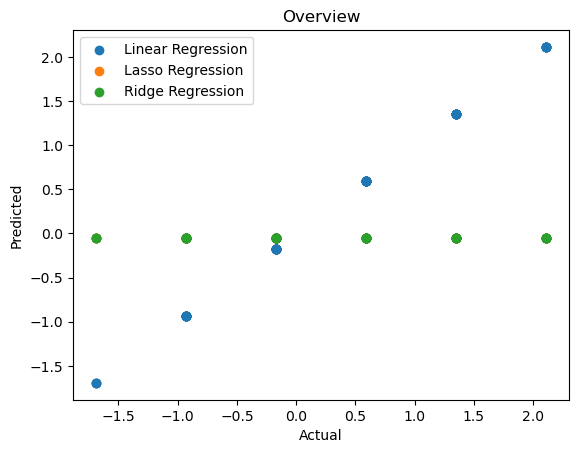

In [81]:
#plot for all
plt.scatter(y_test, lr_prediction,alpha=1.0,label="Linear Regression")
plt.scatter(y_test, lasso_prediction,alpha=1.0,label="Lasso Regression")
plt.scatter(y_test, ridge_prediction,alpha=1.0,label="Ridge Regression")


plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Overview')
plt.legend()
plt.show()

### Grid Search CV 

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [3,4,5],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [84]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, scoring='r2')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [85]:
best_params = grid_search.best_params_

In [86]:
best_model = xgb.XGBRegressor(**best_params)

In [87]:
best_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [88]:
y_pred = best_model.predict(x_test)

In [89]:
r2=r2_score(y_test,y_pred)
print(r2)

0.9999999921219207


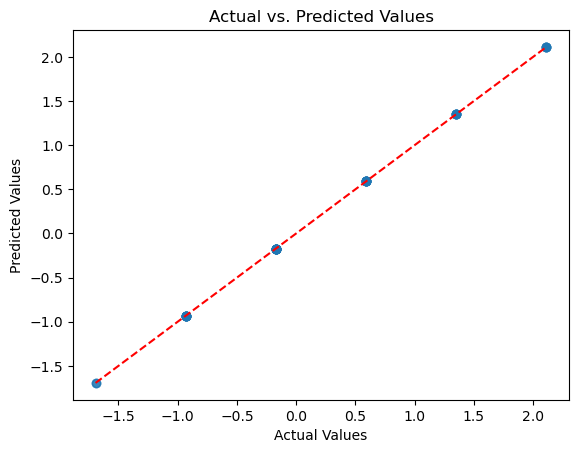

In [90]:
plt.scatter(y_test,y_pred, alpha = 0.5)


plt.plot([min(y_test),max(y_test)], [ min(y_test), max(y_test)], 'r',linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel("Predicted Values")
plt.title('Actual vs. Predicted Values')
plt.show()

### Pickle

In [91]:
import pickle

In [92]:
with open('model.pkl','wb') as f:
    pickle.dump(best_model,f)

In [93]:
with open('model.pkl','rb')as f:
    xgb_model = pickle.load(f)
    

In [94]:
y_pred = xgb_model.predict(x_test)

print(r2_score(y_test,y_pred))

0.9999999921219207


In [95]:
ol_df[cat_data].head()

,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),...,Maximum wait time,Residence in busy location,Google Maps Accuracy,Low quantity low time,Less Delivery time,Number of calls,Politeness,Freshness,Good Taste,Good Quantity
0,Female,Single,Student,No Income,Post Graduate,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),...,30 minutes,Agree,Neutral,Neutral,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important
1,Female,Single,Student,Below Rs.10000,Graduate,Food delivery apps,Web browser,Snacks,Dinner,Non Veg foods (Lunch / Dinner),...,30 minutes,Strongly Agree,Neutral,Strongly disagree,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
2,Male,Single,Student,Below Rs.10000,Post Graduate,Food delivery apps,Direct call,Lunch,Snacks,Non Veg foods (Lunch / Dinner),...,45 minutes,Agree,Strongly Agree,Neutral,Important,Moderately Important,Very Important,Very Important,Very Important,Moderately Important
3,Female,Single,Student,No Income,Graduate,Food delivery apps,Walk-in,Snacks,Dinner,Veg foods (Breakfast / Lunch / Dinner),...,30 minutes,Disagree,Agree,Neutral,Very Important,Moderately Important,Very Important,Very Important,Very Important,Important
4,Male,Single,Student,Below Rs.10000,Post Graduate,Walk-in,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),...,30 minutes,Agree,Agree,Agree,Important,Moderately Important,Important,Important,Very Important,Very Important


# Logistic Regression

In [96]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
categorical_cols=['Marital Status',
 'Occupation',
 'Monthly Income',
 'Educational Qualifications',
 'Medium (P1)',
 'Medium (P2)',
 'Meal(P1)',
 'Meal(P2)',
 'Perference(P1)',
 'Perference(P2)',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Self Cooking',
 'Health Concern',
 'Late Delivery',
 'Poor Hygiene',
 'Bad past experience',
 'Unavailability',
 'Unaffordable',
 'Long delivery time',
 'Delay of delivery person getting assigned',
 'Delay of delivery person picking up food',
 'Wrong order delivered',
 'Missing item',
 'Order placed by mistake',
 'Order Time',
 'Maximum wait time',
 'Residence in busy location',
 'Google Maps Accuracy',
 'Low quantity low time',
 'Less Delivery time',
 'Number of calls',
 'Politeness',
 'Freshness ',
 'Good Taste ',
 'Good Quantity']
encoder=OneHotEncoder(drop='first',sparse=False)
encoder_cols=pd.DataFrame(encoder.fit_transform(ol_df[categorical_cols]),columns=encoder.get_feature_names_out(categorical_cols))

In [97]:
numerical_cols=['Age', 'Family size', 'latitude', 'longitude', 'Pin code']
scaler=StandardScaler()
scaled_cols=pd.DataFrame(scaler.fit_transform(ol_df[numerical_cols]),columns=scaler.get_feature_names_out(numerical_cols))

In [98]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
categorical_cols2=['Gender']
encoder2=OneHotEncoder(drop='first',sparse=False)
encoder_cols2=pd.DataFrame(encoder2.fit_transform(ol_df[categorical_cols2]),columns=encoder2.get_feature_names_out(categorical_cols2))

In [99]:
x=pd.concat([encoder_cols,scaled_cols],axis=1)
y=ol_df['Gender']

In [100]:
x

,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,...,Good Taste _Very Important,Good Quantity_Moderately Important,Good Quantity_Slightly Important,Good Quantity_Unimportant,Good Quantity_Very Important,Age,Family size,latitude,longitude,Pin code
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-1.744835,0.590624,0.121576,0.081628,-1.207519
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.051104,-0.170625,0.130525,-0.419730,-0.951250
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,-0.897970,-0.170625,-0.359456,1.448967,-0.694981
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-0.897970,2.113123,-0.533969,-0.777517,-0.630914
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.897970,0.590624,0.309514,-0.966666,-0.919216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.474537,-0.931874,0.121576,0.081628,-1.207519
344,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.474537,0.590624,0.318463,2.561069,0.298060
345,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.897970,1.351874,0.309514,-0.966666,-0.919216
346,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.474537,-0.931874,0.130525,-0.419730,-0.951250


In [101]:
y

0      Female
1      Female
2        Male
3      Female
4        Male
        ...  
383    Female
384    Female
385    Female
386      Male
387      Male
Name: Gender, Length: 348, dtype: object

In [102]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=0)

In [103]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()

model.fit(x_train,y_train)
y_predicted = model.predict(x_test)

In [104]:
model.predict_proba(x_test)

array([[0.01494192, 0.98505808],
       [0.15197835, 0.84802165],
       [0.70994726, 0.29005274],
       [0.77257346, 0.22742654],
       [0.73300602, 0.26699398],
       [0.37499578, 0.62500422],
       [0.10916502, 0.89083498],
       [0.01351222, 0.98648778],
       [0.5778287 , 0.4221713 ],
       [0.14829847, 0.85170153],
       [0.80724537, 0.19275463],
       [0.89395343, 0.10604657],
       [0.96237811, 0.03762189],
       [0.9400504 , 0.0599496 ],
       [0.80558499, 0.19441501],
       [0.9400504 , 0.0599496 ],
       [0.00513585, 0.99486415],
       [0.39701621, 0.60298379],
       [0.86320712, 0.13679288],
       [0.84184669, 0.15815331],
       [0.80438791, 0.19561209],
       [0.20748071, 0.79251929],
       [0.039261  , 0.960739  ],
       [0.27115361, 0.72884639],
       [0.72721339, 0.27278661],
       [0.30867044, 0.69132956],
       [0.15845267, 0.84154733],
       [0.38245158, 0.61754842],
       [0.41940409, 0.58059591],
       [0.02067065, 0.97932935],
       [0.

In [105]:
model.score(x_test,y_test)

0.7285714285714285

In [106]:
model.coef_ 

array([[-0.05736559,  0.00501903, -0.72798498,  0.82406245,  0.39897245,
        -0.58919565, -0.14237717,  0.81109837, -0.02813384, -0.89677993,
        -0.18692552, -0.28412523,  0.2147436 , -0.45069749,  0.13544773,
        -0.58768121,  0.07022492, -0.70936546, -0.50914917,  0.62412494,
         0.48728636, -0.79207865, -0.0369595 ,  0.44562124,  0.03872331,
        -0.11651827, -0.32821805, -0.64061528,  0.68653793, -0.00921293,
        -0.96733887,  0.36940252, -0.13257206, -0.19619993, -0.41044617,
         0.6429544 ,  0.205461  , -0.40145809, -0.58092999, -0.39215027,
        -0.10858481,  0.61572311, -0.74975193,  0.41730678, -0.02119369,
        -0.55768514,  0.34966843,  0.63727695, -0.62290144,  0.93132931,
        -0.21330182, -0.45407998, -0.13612677,  0.15392619, -0.0321745 ,
         0.636665  , -0.06105469, -0.08152969,  0.49801008,  0.50332478,
        -0.41452787, -0.01294166,  0.10791905,  0.27046036,  0.19296417,
         0.71249981,  0.22046486, -1.48068509,  0.8

In [107]:
model.intercept_   #y_intercept

array([0.54654461])

In [108]:
import math

def sigmoid(x):
    return 1/(1 + math.exp(-x))

In [109]:
def prediction_function(age):
    z= 0.14915498 * age - 5.80219736 # y = B0 + B1 * x
    y = sigmoid(z)
    return y

In [294]:
#Calculating Test Score
print('Test Score : ', model.score(x_test, y_test))

Test Score :  0.7285714285714285


In [295]:
#Predicting the train value
pred_train = model.predict(x_train)

In [296]:
#Predicting the test value
pred_test = model.predict(x_test)

In [297]:
#Classification report for the Training set
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

      Female       0.92      0.89      0.91       120
        Male       0.92      0.94      0.93       158

    accuracy                           0.92       278
   macro avg       0.92      0.92      0.92       278
weighted avg       0.92      0.92      0.92       278



### Tuning  

In [110]:
param_grid = {
    'penalty' : ['l1', 'l2'],                         #l1 lasso l2 Ridge
    'C' : [0.1, 0.5, 1, 5, 10]
}

In [111]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)


In [112]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [113]:
best_params = grid.best_params_

In [114]:
 #Getting the best hyperparameters
best_param = grid.best_params_

# Getting the best model
best_model = grid.best_estimator_

In [115]:
# Making predictions on the test set
Y_pred = best_model.predict(x_test)

In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


# Evaluating the best model
acc_log = accuracy_score(y_test, Y_pred)
#pre = precision_score(y_test, Y_pred)
#rec = recall_score(y_test, Y_pred)
#f1 = f1_score(y_test, Y_pred)
#roc_auc = roc_auc_score(y_test, Y_pred)

In [117]:
acc_log

0.7142857142857143

In [118]:
#Confusion Matrix after Grid Search
confusion = confusion_matrix(y_test, Y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[16 14]
 [ 6 34]]


In [119]:
#Classification report after Grid Search
classification_rep = classification_report(y_test, Y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

      Female       0.73      0.53      0.62        30
        Male       0.71      0.85      0.77        40

    accuracy                           0.71        70
   macro avg       0.72      0.69      0.69        70
weighted avg       0.72      0.71      0.71        70



In [120]:
from scipy.stats import uniform


# Defining hyperparameters and their possible values for tuning
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': uniform(loc=0, scale=4)  # Random values between 0 and 4 for regularization strength (C)
}

In [121]:
from sklearn.model_selection import  RandomizedSearchCV

# Creating a RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)

In [122]:
# Fitting the RandomizedSearchCV object to the training data
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000166442DF090>,
                                        'penalty': ['l1', 'l2']},
                   random_state=42)

In [123]:
# Getting the best hyperparameters
best_params = random_search.best_params_

In [124]:
# Getting the best model
best_model = random_search.best_estimator_

In [125]:
# Making predictions on the test set
Y_pred = best_model.predict(x_test)

In [126]:
# Evaluating the best model
acc = accuracy_score(y_test, Y_pred)
acc

0.7285714285714285

In [127]:
#Confusion Matrix after Randomized Search
confusion = confusion_matrix(y_test, Y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[16 14]
 [ 5 35]]


In [128]:
#Classification report after Randomized Search
classification_rep = classification_report(y_test, Y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

      Female       0.76      0.53      0.63        30
        Male       0.71      0.88      0.79        40

    accuracy                           0.73        70
   macro avg       0.74      0.70      0.71        70
weighted avg       0.73      0.73      0.72        70



# SVM

In [129]:
#Libraries required for SVM and Naive Bayes
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn import model_selection, naive_bayes, svm, metrics, feature_extraction

#Spliting the data into Training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [130]:
X_train.shape

(278, 157)

In [131]:
X_test.shape

(70, 157)

In [132]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [133]:
#Running with default hyperparameter
svc = SVC()

In [134]:
svc.fit(X_train, Y_train)

SVC()

In [135]:
Y_pred = svc.predict(X_test)

In [136]:
#Accuracy of SVM model
acc_svm = accuracy_score(Y_test, Y_pred)
print("Accuracy Score with default parameter : {:.2f}%". format(acc_svm*100))

Accuracy Score with default parameter : 78.57%


In [137]:
#Classification report of SVM model
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      Female       0.76      0.54      0.63        24
        Male       0.79      0.91      0.85        46

    accuracy                           0.79        70
   macro avg       0.78      0.73      0.74        70
weighted avg       0.78      0.79      0.77        70



In [138]:
#Confusion Matrix of SVM model
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[13 11]
 [ 4 42]]
True Positives(TP) =  13
True Negatives(TN) =  42
False Positives(FP) =  11
False Negatives(FN) =  4


<Axes: >

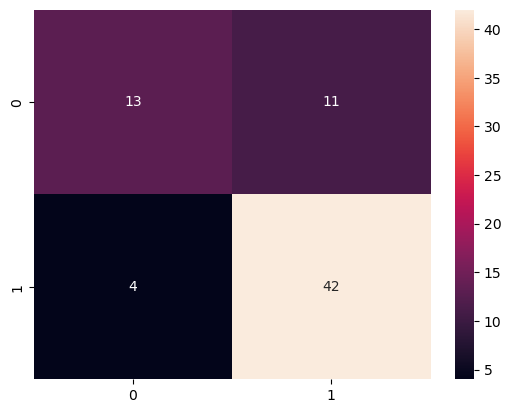

In [139]:
sns.heatmap(cm, annot=True)

In [140]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, label_binarize
yb = label_binarize(y, classes=[0,1])

In [141]:
nc = yb.shape[1]

In [142]:
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

In [143]:
Y_score = classifier.fit(X_train, Y_train).decision_function(X_test)

In [146]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range (nc):
    fpr, tpr, _ = roc_curve(Y_test, Y_score,pos_label=1)
    roc_auc = auc(fpr, tpr)
    
   

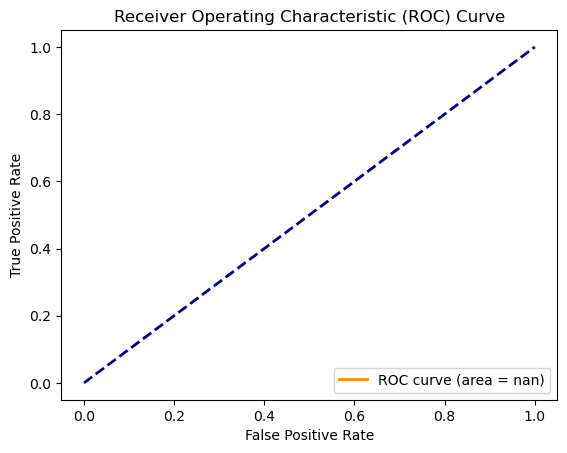

In [147]:
##AUC-ROC curve is plotted 
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', color='navy', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [150]:
#SVM with linear kernel

linear_svc = SVC(kernel='linear')

In [151]:
linear_svc.fit(X_train, Y_train)

SVC(kernel='linear')

In [152]:
Y_predLinear = linear_svc.predict(X_test)

In [153]:
acc = accuracy_score(Y_test, Y_predLinear)
print("Accuracy Score with Linear Kernel : {:.2f}%". format(acc*100))

Accuracy Score with Linear Kernel : 71.43%


In [154]:
print(classification_report(Y_test, Y_predLinear))

              precision    recall  f1-score   support

      Female       0.58      0.62      0.60        24
        Male       0.80      0.76      0.78        46

    accuracy                           0.71        70
   macro avg       0.69      0.69      0.69        70
weighted avg       0.72      0.71      0.72        70



In [155]:
cm = confusion_matrix(Y_test, Y_predLinear)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[15  9]
 [11 35]]
True Positives(TP) =  15
True Negatives(TN) =  35
False Positives(FP) =  9
False Negatives(FN) =  11


<Axes: >

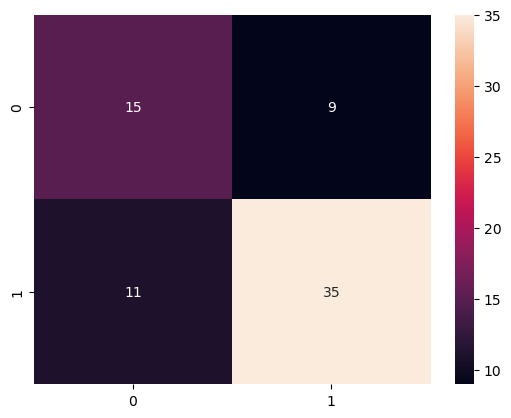

In [156]:
sns.heatmap(cm, annot=True)

In [157]:
#SVM with RBF Kernel

rbf_svc = SVC(kernel='rbf')

In [158]:
rbf_svc.fit(X_train, Y_train)

SVC()

In [159]:
Y_predRBF = rbf_svc.predict(X_test)

In [160]:
acc = accuracy_score(Y_test, Y_predRBF)
print("Accuracy Score with RBF Kernel : {:.2f}%". format(acc*100))

Accuracy Score with RBF Kernel : 78.57%


In [161]:
print(classification_report(Y_test, Y_predRBF))

              precision    recall  f1-score   support

      Female       0.76      0.54      0.63        24
        Male       0.79      0.91      0.85        46

    accuracy                           0.79        70
   macro avg       0.78      0.73      0.74        70
weighted avg       0.78      0.79      0.77        70



In [162]:
cm = confusion_matrix(Y_test, Y_predRBF)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[13 11]
 [ 4 42]]
True Positives(TP) =  13
True Negatives(TN) =  42
False Positives(FP) =  11
False Negatives(FN) =  4


<Axes: >

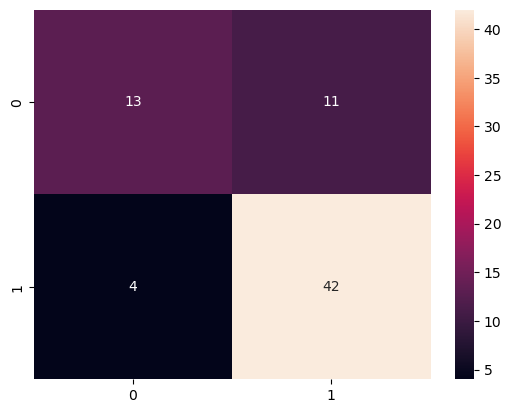

In [163]:
sns.heatmap(cm, annot=True)

In [164]:
#SVM with Sigmoid Kernel

sigmoid_svc = SVC(kernel='sigmoid')

In [165]:
sigmoid_svc.fit(X_train, Y_train)

SVC(kernel='sigmoid')

In [166]:
Y_predsigmoid = sigmoid_svc.predict(X_test)

In [167]:
acc = accuracy_score(Y_test, Y_predsigmoid)
print("Accuracy Score with Sigmoid Kernel : {:.2f}%". format(acc*100))

Accuracy Score with Sigmoid Kernel : 60.00%


In [168]:
print(classification_report(Y_test, Y_predsigmoid))

              precision    recall  f1-score   support

      Female       0.43      0.54      0.48        24
        Male       0.72      0.63      0.67        46

    accuracy                           0.60        70
   macro avg       0.58      0.59      0.58        70
weighted avg       0.62      0.60      0.61        70



In [169]:
cm = confusion_matrix(Y_test, Y_predsigmoid)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[13 11]
 [17 29]]
True Positives(TP) =  13
True Negatives(TN) =  29
False Positives(FP) =  11
False Negatives(FN) =  17


<Axes: >

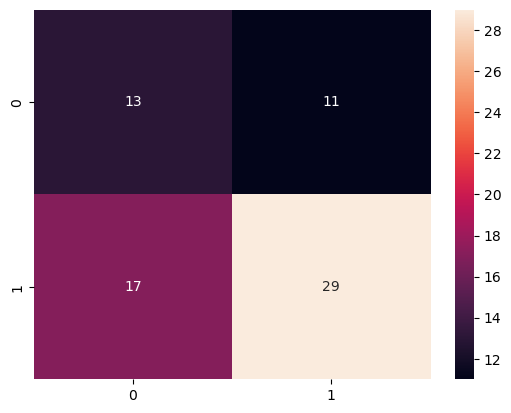

In [170]:
sns.heatmap(cm, annot=True)

In [171]:
#SVM with Polynomial Kernel

poly_svc = SVC(kernel='poly')

In [172]:
poly_svc.fit(X_train, Y_train)

SVC(kernel='poly')

In [173]:
Y_predPoly = poly_svc.predict(X_test)

In [174]:
acc = accuracy_score(Y_test, Y_predPoly)
print("Accuracy Score with Polynomial Kernel : {:.2f}%". format(acc*100))

Accuracy Score with Polynomial Kernel : 78.57%


In [175]:
print(classification_report(Y_test, Y_predPoly))

              precision    recall  f1-score   support

      Female       0.91      0.42      0.57        24
        Male       0.76      0.98      0.86        46

    accuracy                           0.79        70
   macro avg       0.84      0.70      0.71        70
weighted avg       0.81      0.79      0.76        70



In [176]:
cm = confusion_matrix(Y_test, Y_predPoly)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[10 14]
 [ 1 45]]
True Positives(TP) =  10
True Negatives(TN) =  45
False Positives(FP) =  14
False Negatives(FN) =  1


<Axes: >

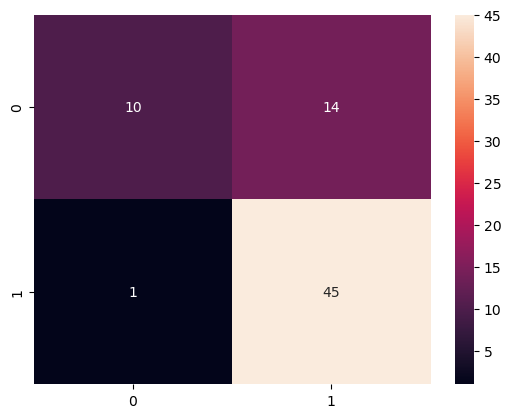

In [177]:
sns.heatmap(cm, annot=True)

# Tuning - SVM

In [178]:
#Grid Search

param_grid = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
}

In [179]:
svcm = SVC()

In [180]:
grid_search = GridSearchCV(svcm, param_grid, cv=5)

In [181]:

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [182]:
best_param = grid_search.best_params_
print("Best hyperparameter : ", best_param)

Best hyperparameter :  {'C': 10, 'kernel': 'rbf'}


In [183]:
best_svm = SVC(C=best_param['C'], kernel=best_param['kernel'])

In [184]:
best_svm.fit(X_train, Y_train)

SVC(C=10)

In [185]:
Y_pred = best_svm.predict(X_test)

In [186]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy after Grid Search : {:.2f}%". format(acc * 100))

Accuracy after Grid Search : 77.14%


In [187]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      Female       0.68      0.62      0.65        24
        Male       0.81      0.85      0.83        46

    accuracy                           0.77        70
   macro avg       0.75      0.74      0.74        70
weighted avg       0.77      0.77      0.77        70



In [188]:
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[15  9]
 [ 7 39]]
True Positives(TP) =  15
True Negatives(TN) =  39
False Positives(FP) =  9
False Negatives(FN) =  7


<Axes: >

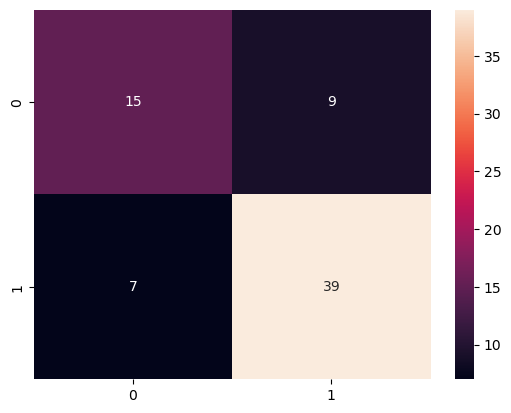

In [189]:
sns.heatmap(cm, annot=True)

In [190]:
#Tuning the model with Random Search

param_grid = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
}

In [191]:
svcm = SVC()

In [192]:
random_search = RandomizedSearchCV(svcm, param_grid, cv=5)

In [193]:
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']})

In [194]:
best_param = random_search.best_params_
print("Best Parameter : ", best_param)

Best Parameter :  {'kernel': 'rbf', 'C': 100}


In [195]:
best_svm = SVC(C=best_param['C'], kernel=best_param['kernel'])

In [196]:
best_svm.fit(X_train, Y_train)

SVC(C=100)

In [197]:
Y_pred = best_svm.predict(X_test)

In [198]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy after Randomized Search: {:.2f}%" . format(acc * 100))

Accuracy after Randomized Search: 77.14%


In [199]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      Female       0.68      0.62      0.65        24
        Male       0.81      0.85      0.83        46

    accuracy                           0.77        70
   macro avg       0.75      0.74      0.74        70
weighted avg       0.77      0.77      0.77        70



In [200]:
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[15  9]
 [ 7 39]]
True Positives(TP) =  15
True Negatives(TN) =  39
False Positives(FP) =  9
False Negatives(FN) =  7


<Axes: >

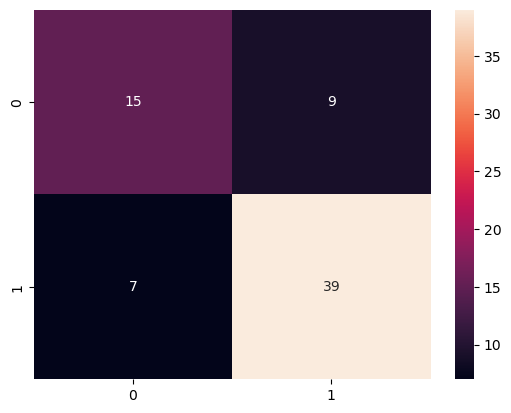

In [201]:
sns.heatmap(cm, annot=True)

# Naive Bayes

In [202]:
from sklearn.preprocessing import MinMaxScaler

#Min max scaler is used in order to convert all values of X in the range of 0 to 1.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [203]:
#choosing the naive bayes 
bayes = naive_bayes.MultinomialNB()

In [204]:
#Training the model
bayes.fit(X_train, Y_train)

MultinomialNB()

In [205]:
#Making prediction on the test set
Y_pred = bayes.predict(X_test)

In [206]:
#Accuracy of Naive Bayes model
acc_nb = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy Score of Naive Bayes : {:.2f}%". format(acc_nb*100))

Accuracy Score of Naive Bayes : 62.86%


In [207]:
#Classification report of Nave bayes Model
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      Female       0.46      0.50      0.48        24
        Male       0.73      0.70      0.71        46

    accuracy                           0.63        70
   macro avg       0.59      0.60      0.60        70
weighted avg       0.64      0.63      0.63        70



In [208]:
#Confusion matrix of Nave bayes Model
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[12 12]
 [14 32]]
True Positives(TP) =  12
True Negatives(TN) =  32
False Positives(FP) =  12
False Negatives(FN) =  14


<Axes: >

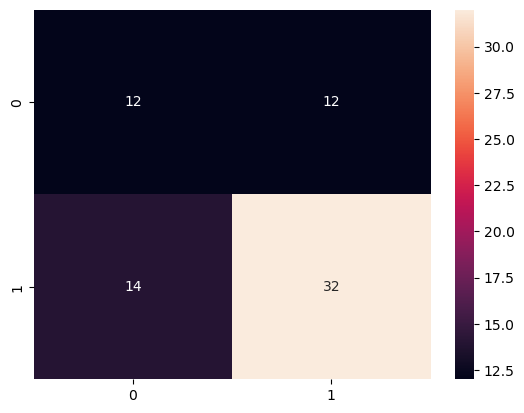

In [209]:
sns.heatmap(cm, annot=True)

# Tuning - Naive Bayes

In [210]:
#Grid Search
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'fit_prior': [True, False]
}

In [211]:
bayes = naive_bayes.MultinomialNB()

In [212]:
grid_search = GridSearchCV(bayes, param_grid, cv=5)

In [213]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'fit_prior': [True, False]})

In [214]:
best_param = grid_search.best_params_
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'alpha': 1, 'fit_prior': False}


In [215]:
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])

In [216]:
best_nb.fit(X_train, Y_train)

MultinomialNB(alpha=1, fit_prior=False)

In [217]:
Y_pred = best_nb.predict(X_test)

In [218]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy Score after Grid Search : {:.2f}%". format(acc*100))

Accuracy Score after Grid Search : 62.86%


In [219]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      Female       0.46      0.54      0.50        24
        Male       0.74      0.67      0.70        46

    accuracy                           0.63        70
   macro avg       0.60      0.61      0.60        70
weighted avg       0.64      0.63      0.63        70



In [220]:
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[13 11]
 [15 31]]
True Positives(TP) =  13
True Negatives(TN) =  31
False Positives(FP) =  11
False Negatives(FN) =  15


<Axes: >

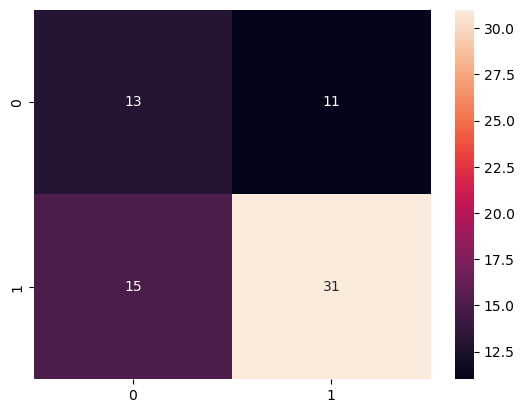

In [221]:
sns.heatmap(cm, annot=True)

In [222]:
#Naive Bayes - Randomized Search

param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'fit_prior': [True, False]
}

In [223]:
bayes = naive_bayes.MultinomialNB()

In [224]:
random_search = RandomizedSearchCV(bayes, param_grid, cv=5)

In [225]:
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=MultinomialNB(),
                   param_distributions={'alpha': [0.1, 1, 10, 100],
                                        'fit_prior': [True, False]})

In [226]:
best_param = random_search.best_params_
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'fit_prior': False, 'alpha': 1}


In [227]:
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])

In [228]:
best_nb.fit(X_train, Y_train)

MultinomialNB(alpha=1, fit_prior=False)

In [229]:
Y_pred = best_nb.predict(X_test)

In [230]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy Score after Randomized Search : {:.2f}%". format(acc*100))

Accuracy Score after Randomized Search : 62.86%


In [231]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      Female       0.46      0.54      0.50        24
        Male       0.74      0.67      0.70        46

    accuracy                           0.63        70
   macro avg       0.60      0.61      0.60        70
weighted avg       0.64      0.63      0.63        70



In [232]:
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[13 11]
 [15 31]]
True Positives(TP) =  13
True Negatives(TN) =  31
False Positives(FP) =  11
False Negatives(FN) =  15


<Axes: >

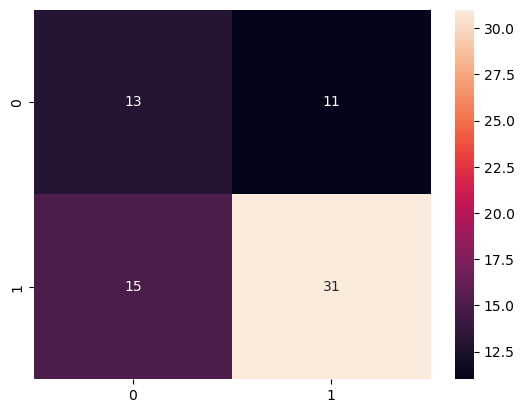

In [233]:
sns.heatmap(cm, annot=True)

# K-Nearest Neighbor (KNN)

In [234]:
from sklearn.neighbors import KNeighborsClassifier


#Spliting the data into Training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [235]:
knn = KNeighborsClassifier(n_neighbors=10)

#Training the model
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [236]:
knn.score(X_test,Y_test)

0.5714285714285714

In [237]:
#Making prediction on test set
Y_pred= knn.predict(X_test)

In [238]:
#Accuracy of KNN model
acc_knn = accuracy_score(Y_test, Y_pred)
print("Accuracy:", acc_knn)

Accuracy: 0.5714285714285714


In [239]:
#Classification report of KNN model
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      Female       0.43      0.75      0.55        24
        Male       0.79      0.48      0.59        46

    accuracy                           0.57        70
   macro avg       0.61      0.61      0.57        70
weighted avg       0.66      0.57      0.58        70



In [240]:
#Confusion Matrix of KNN model
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[18  6]
 [24 22]]
True Positives(TP) =  18
True Negatives(TN) =  22
False Positives(FP) =  6
False Negatives(FN) =  24


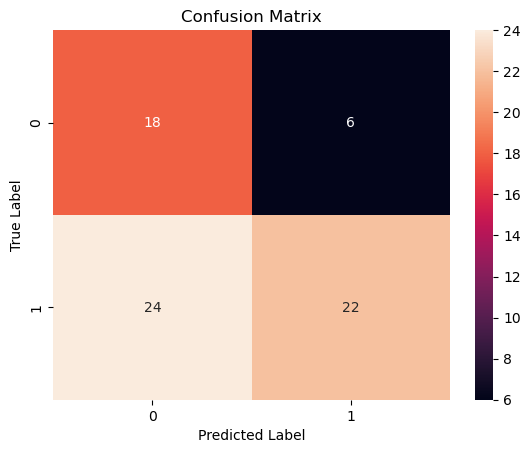

In [241]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Tuning - KNN

In [242]:
#Grid Search

param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Test different values of k
    'weights': ['uniform', 'distance'],  # Weighting type
    'p': [1, 2],  # Distance metric (1 for Manhattan, 2 for Euclidean)
}

In [243]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5,scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [244]:
best_param = grid_search.best_params_
best_knn = KNeighborsClassifier(n_neighbors = best_param['n_neighbors'], weights = best_param['weights'],p=best_param['p'])
best_knn.fit(X_train, Y_train)
Y_pred = best_knn.predict(X_test)

In [245]:
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [246]:
acc = accuracy_score(Y_test, Y_pred)
acc

0.6714285714285714

In [247]:
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      Female       0.52      0.62      0.57        24
        Male       0.78      0.70      0.74        46

    accuracy                           0.67        70
   macro avg       0.65      0.66      0.65        70
weighted avg       0.69      0.67      0.68        70



In [248]:
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[15  9]
 [14 32]]
True Positives(TP) =  15
True Negatives(TN) =  32
False Positives(FP) =  9
False Negatives(FN) =  14


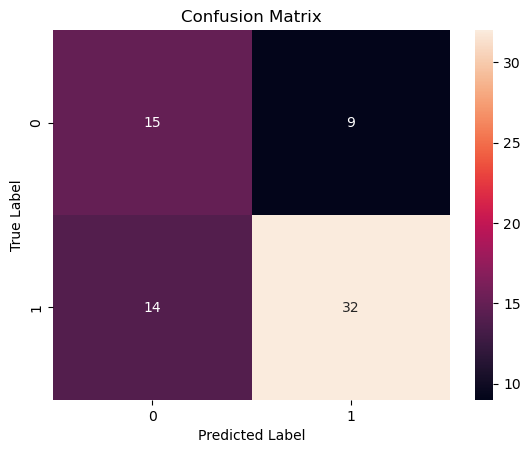

In [249]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [250]:
# Evaluating the best model using cross-validation
cross_val_scores = cross_val_score(best_knn, x, y, cv=5, scoring='accuracy')
mean_accuracy = cross_val_scores.mean()
print(f"Cross-Validation Mean Accuracy: {mean_accuracy:.2f}")

Cross-Validation Mean Accuracy: 0.68


In [251]:
#Choosing the right k

# Define a range of k values to explore
k_values = list(range(1, 21))  # Explore k values from 1 to 20

In [252]:
# Initialize lists to store mean accuracy for each k
mean_accuracies = []

In [253]:
# Iterate through different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform cross-validation with k neighbors
    scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(scores)
    mean_accuracies.append(mean_accuracy)

In [254]:
# Find the optimal k
optimal_k = k_values[mean_accuracies.index(max(mean_accuracies))]

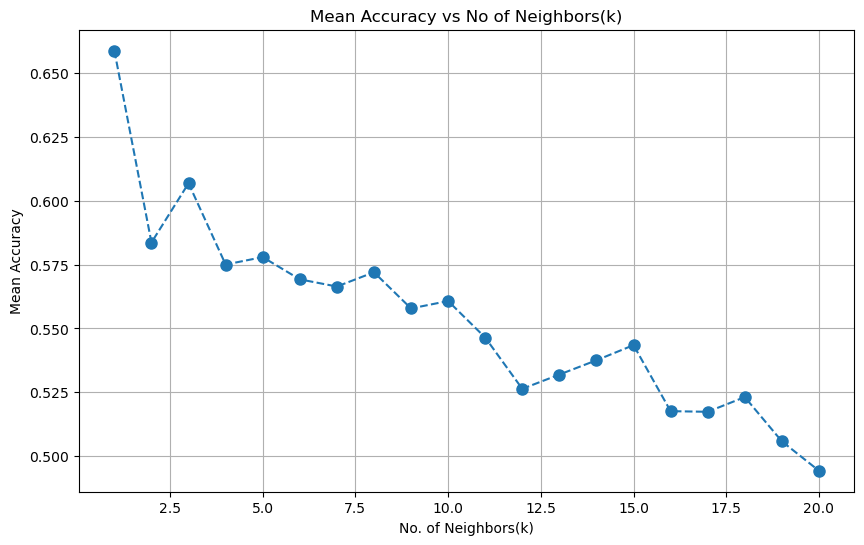

In [255]:
# Plot the mean accuracy for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='dashed', markersize=8)
plt.title("Mean Accuracy vs No of Neighbors(k)")
plt.xlabel("No. of Neighbors(k)")
plt.ylabel("Mean Accuracy")
plt.grid()
plt.show()

In [256]:
#Print the optimal k
print("Optimal k : ", optimal_k)

Optimal k :  1


In [257]:
#Dimensional Reduction

from sklearn.decomposition import PCA

# Perform dimensionality reduction using PCA
pca = PCA(n_components=5)  # You can choose the number of components based on your dataset
X_reduced = pca.fit_transform(x)

In [258]:
# Split the reduced data into a training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [259]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Test different values of k
    'weights': ['uniform', 'distance'],  # Weighting type
    'p': [1, 2],  # Distance metric (1 for Manhattan, 2 for Euclidean)
}

In [260]:
# Create the KNN classifier
knn = KNeighborsClassifier()

In [261]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [262]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [263]:
# Fit the model with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, Y_train)


KNeighborsClassifier(weights='distance')

In [264]:
# Make predictions on the test data
Y_pred = best_knn.predict(X_test)

In [265]:
# Evaluate the model
print("Best Hyperparameter : ", best_param)
acc = accuracy_score(Y_test, Y_pred)
print("Acuuracy : ", acc)

Best Hyperparameter :  {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Acuuracy :  0.6714285714285714


In [266]:
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      Female       0.52      0.58      0.55        24
        Male       0.77      0.72      0.74        46

    accuracy                           0.67        70
   macro avg       0.64      0.65      0.65        70
weighted avg       0.68      0.67      0.68        70



In [267]:
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[14 10]
 [13 33]]
True Positives(TP) =  14
True Negatives(TN) =  33
False Positives(FP) =  10
False Negatives(FN) =  13


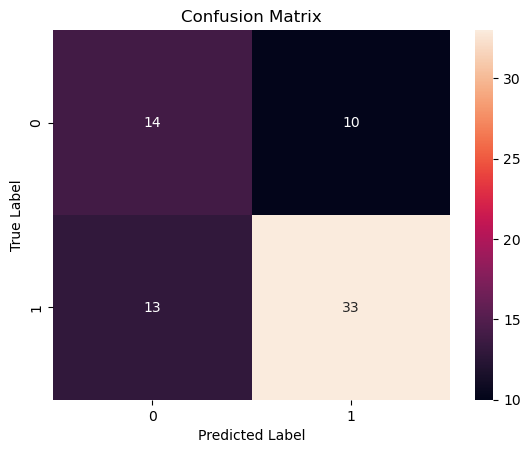

In [268]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [269]:
#Euclidean method

knn_classifier = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

In [270]:
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [271]:
Y_pred = knn_classifier.predict(X_test)

In [272]:
accuracy = accuracy_score(Y_test, Y_pred)  # For classification
print('accuracy:',accuracy)

accuracy: 0.5285714285714286


In [273]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      Female       0.37      0.54      0.44        24
        Male       0.69      0.52      0.59        46

    accuracy                           0.53        70
   macro avg       0.53      0.53      0.52        70
weighted avg       0.58      0.53      0.54        70



In [274]:
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[13 11]
 [22 24]]
True Positives(TP) =  13
True Negatives(TN) =  24
False Positives(FP) =  11
False Negatives(FN) =  22


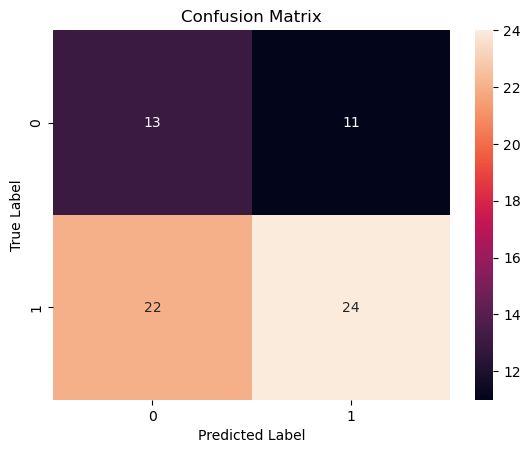

In [275]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [276]:
#Manhatan distance method

knn_classifier = KNeighborsClassifier(n_neighbors=10, metric='manhattan')

In [277]:
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [278]:
Y_pred = knn_classifier.predict(X_test)

In [279]:
accuracy = accuracy_score(Y_test, Y_pred) 
print('accuracy:',accuracy)

accuracy: 0.5142857142857142


In [280]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      Female       0.35      0.50      0.41        24
        Male       0.67      0.52      0.59        46

    accuracy                           0.51        70
   macro avg       0.51      0.51      0.50        70
weighted avg       0.56      0.51      0.53        70



In [281]:
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[12 12]
 [22 24]]
True Positives(TP) =  12
True Negatives(TN) =  24
False Positives(FP) =  12
False Negatives(FN) =  22


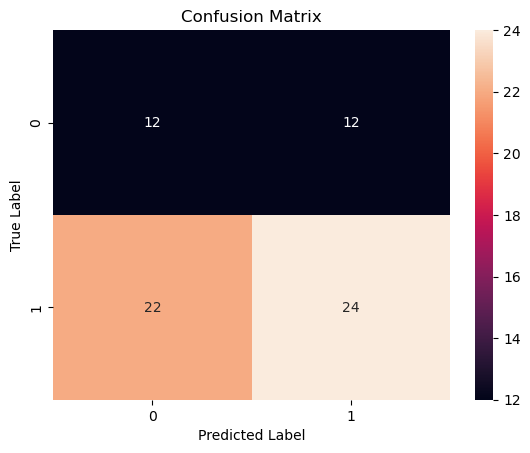

In [282]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [283]:
#Minkowsky distance method

knn_classifier = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)

In [284]:
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [285]:
Y_pred = knn_classifier.predict(X_test)

In [286]:
accuracy = accuracy_score(Y_test, Y_pred)  # For classification
print('accuracy:',accuracy)

accuracy: 0.5285714285714286


In [287]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      Female       0.37      0.54      0.44        24
        Male       0.69      0.52      0.59        46

    accuracy                           0.53        70
   macro avg       0.53      0.53      0.52        70
weighted avg       0.58      0.53      0.54        70



In [288]:
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[13 11]
 [22 24]]
True Positives(TP) =  13
True Negatives(TN) =  24
False Positives(FP) =  11
False Negatives(FN) =  22


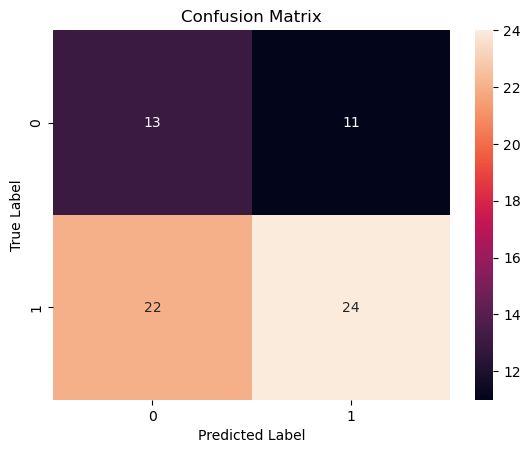

In [289]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [290]:
# Create a dictionary to store accuracy values for each model
df_acc = {
    "Model": ["Linear Regression", "Logistic Regression", "SVM", "Naive Bayes", "k-NN"],
    "Accuracy": [r2, acc_log, acc_svm, acc_nb, acc_knn]
}

# Create a Pandas DataFrame from the dictionary
accuracy_df = pd.DataFrame(df_acc)

# Display the DataFrame as a table
accuracy_df

,Model,Accuracy
0,Linear Regression,1.000000
1,Logistic Regression,0.714286
2,SVM,0.785714
3,Naive Bayes,0.628571
4,k-NN,0.571429
